In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## Reading in DataFrame

In [2]:
data = pd.read_csv('indian_states.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,id,m_id,client_m_id,hl_id,house_no,house_hold_no,state,district,...,householdstatus,isheadchanged,fidh,fidx,as,wt,x,schedule_id,year,v126
0,0,0,165767,10.0,NaN,NaN,132,1,5,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN
1,1,1,167609,4.0,NaN,NaN,111,1,5,2,...,1.0,2.0,5.022170e+13,NaN,NaN,2.46,NaN,4,3,NaN
2,2,2,530767,954.0,NaN,25345.0,19,1,5,1,...,NaN,NaN,NaN,2.534505e+11,0.847674,6.00,NaN,4,1,NaN
3,3,3,530775,962.0,NaN,25535.0,72,6,5,1,...,NaN,NaN,NaN,2.553505e+11,2.690161,6.00,NaN,4,1,NaN
4,4,4,167601,26.0,NaN,NaN,248,2,5,2,...,1.0,2.0,5.022160e+13,NaN,NaN,2.46,NaN,4,3,NaN


## Feature Removal 

### These features were removed because either too much of the data was null, or because they were not relevant to the analysis (ID numbers etc) 

In [3]:
# These features were removed because either too much of the data was null,
# or because they were not relevant to the analysis (ID numbers etc) 

features_to_remove = ['id', 'm_id', 'client_m_id',
                      'hl_id', 'psu_id', 'm_serial_no', 'stratum_code',
                      'age_of_death_above_one_year', 'house_no',
                      'is_death_reg', 'is_death_certificate_received',
                      'serial_num_of_infant_mother',
                      'order_of_birth', 'death_period', 'months_of_pregnancy',
                      'factors_contributing_death', 'factors_contributing_death_2',
                      'symptoms_of_death', 'time_between_onset_of_complicati',
                      'm_expall_status', 'hh_id',
                      'client_hh_id', 'currently_dead_or_out_migrated', 
                      'hh_serial_no', 'relation_to_head',
                      'member_identity', 'father_serial_no', 'mother_serial_no',
                      'social_group_code', 'currently_attending_school', 'reason_for_not_attending_school', 
                      'symptoms_pertaining_illness', 'diagnosed_for', 'diagnosis_source',
                      'regular_treatment_source', 'regular_treatment',
                      'status', 'hh_expall_status', 'client_hl_id',
                      'serial_no', 'building_no', 'house_status',
                      'house_structure', 'no_of_dwelling_rooms', 'hl_expall_status',
                      'fid', 'isdeadmigrated', 'residancial_status', 'healthscheme_1',
                      'healthscheme_2','housestatus','householdstatus','isheadchanged',
                      'fidh','fidx', 'as','wt','x','schedule_id','year','v126', 
                      'age_of_death_below_one_month', 'age_of_death_below_eleven_month', 
                      'nearest_medical_facility', 'field38', 'deceased_sex', 'is_sewing_machine',
                      'is_bicycle', 'is_scooter', 'is_tractor', 'cart', 'date_of_birth', 'date_of_death',
                      'month_of_death', 'month_of_birth', 'year_of_death', 'year_of_birth',
                      'is_death_associated_with_pregnan', 'injury_treatment_type',
                      'place_of_death', 'death_symptoms', 'sought_medical_care',
                      'water_filteration', 'toilet_used', 'treatment_source',
                      'drinking_water_source'
                     ]

In [4]:
len(features_to_remove)

86

## Data to be Analyzed

In [5]:
testing_data = data.drop(features_to_remove, axis = 1)
testing_data.head()

,Unnamed: 0,Unnamed: 0.1,house_hold_no,state,district,rural,sex,usual_residance,age,religion,...,is_radio,is_television,is_computer,is_telephone,is_washing_machine,is_refrigerator,is_car,is_water_pump,land_possessed,iscoveredbyhealthscheme
0,0,0,1,5,9,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,5,2,1.0,1.0,1.0,28.0,1.0,...,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,2,2,1,5,1,2.0,1.0,1.0,45.0,1.0,...,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,6.0,NaN
3,3,3,6,5,1,2.0,2.0,1.0,50.0,1.0,...,2.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0,6.0,NaN
4,4,4,2,5,2,1.0,2.0,1.0,36.0,1.0,...,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0


In [6]:
testing_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'house_hold_no', 'state', 'district',
       'rural', 'sex', 'usual_residance', 'age', 'religion', 'marital_status',
       'date_of_marriage', 'month_of_marriage', 'year_of_marriage',
       'highest_qualification', 'occupation_status', 'disability_status',
       'illness_type', 'chew', 'smoke', 'alcohol', 'owner_status',
       'is_water_filter', 'is_toilet_shared', 'household_have_electricity',
       'lighting_source', 'cooking_fuel', 'kitchen_availability', 'is_radio',
       'is_television', 'is_computer', 'is_telephone', 'is_washing_machine',
       'is_refrigerator', 'is_car', 'is_water_pump', 'land_possessed',
       'iscoveredbyhealthscheme'],
      dtype='object')

In [7]:
# The following data will not be part of the regresssion, but useful for some visualizations
test_features = ['religion', 'date_of_marriage', 'month_of_marriage',
                 'year_of_marriage', 'is_radio', 'is_television',
                 'is_computer', 'is_telephone', 'is_washing_machine',
                 'is_car', 'is_water_pump', 'land_possessed']

In [8]:
len(test_features)

12

## Regression Analysis Data

In [9]:
working_data = testing_data.drop(test_features, axis = 1)
working_data.head()

,Unnamed: 0,Unnamed: 0.1,house_hold_no,state,district,rural,sex,usual_residance,age,marital_status,...,alcohol,owner_status,is_water_filter,is_toilet_shared,household_have_electricity,lighting_source,cooking_fuel,kitchen_availability,is_refrigerator,iscoveredbyhealthscheme
0,0,0,1,5,9,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,5,2,1.0,1.0,1.0,28.0,3.0,...,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0
2,2,2,1,5,1,2.0,1.0,1.0,45.0,3.0,...,2.0,2.0,2.0,2.0,1.0,1.0,6.0,2.0,2.0,NaN
3,3,3,6,5,1,2.0,2.0,1.0,50.0,5.0,...,4.0,2.0,1.0,2.0,1.0,1.0,6.0,1.0,1.0,NaN
4,4,4,2,5,2,1.0,2.0,1.0,36.0,5.0,...,4.0,1.0,2.0,NaN,1.0,1.0,1.0,1.0,2.0,1.0


In [10]:
working_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'house_hold_no', 'state', 'district',
       'rural', 'sex', 'usual_residance', 'age', 'marital_status',
       'highest_qualification', 'occupation_status', 'disability_status',
       'illness_type', 'chew', 'smoke', 'alcohol', 'owner_status',
       'is_water_filter', 'is_toilet_shared', 'household_have_electricity',
       'lighting_source', 'cooking_fuel', 'kitchen_availability',
       'is_refrigerator', 'iscoveredbyhealthscheme'],
      dtype='object')

In [11]:
len(testing_data), len(working_data)

(487249, 487249)

In [12]:
testing_data.shape

(487249, 38)

In [13]:
working_data.shape

(487249, 26)

In [14]:
viz_data = testing_data[['religion', 'date_of_marriage', 'month_of_marriage',
                        'year_of_marriage', 'is_radio', 'is_television',
                        'is_computer', 'is_telephone', 'is_washing_machine',
                        'is_car', 'is_water_pump', 'land_possessed']]
viz_data.head()

,religion,date_of_marriage,month_of_marriage,year_of_marriage,is_radio,is_television,is_computer,is_telephone,is_washing_machine,is_car,is_water_pump,land_possessed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,19.0,2.0,2004.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0
2,1.0,8.0,12.0,1994.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,6.0
3,1.0,0.0,0.0,1972.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,6.0
4,1.0,19.0,10.0,1999.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0


In [15]:
viz_data.shape

(487249, 12)

In [16]:
viz_data_2 = data[['date_of_birth', 'date_of_death', 'month_of_death',
                   'month_of_birth', 'year_of_death', 'year_of_birth',
                   'is_death_associated_with_pregnan', 'injury_treatment_type',
                   'place_of_death', 'death_symptoms', 'sought_medical_care',
                   'water_filteration', 'toilet_used', 'treatment_source',
                   'drinking_water_source']]

# Cleaning Working Data

In [17]:
working_data.head()

,Unnamed: 0,Unnamed: 0.1,house_hold_no,state,district,rural,sex,usual_residance,age,marital_status,...,alcohol,owner_status,is_water_filter,is_toilet_shared,household_have_electricity,lighting_source,cooking_fuel,kitchen_availability,is_refrigerator,iscoveredbyhealthscheme
0,0,0,1,5,9,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,5,2,1.0,1.0,1.0,28.0,3.0,...,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0
2,2,2,1,5,1,2.0,1.0,1.0,45.0,3.0,...,2.0,2.0,2.0,2.0,1.0,1.0,6.0,2.0,2.0,NaN
3,3,3,6,5,1,2.0,2.0,1.0,50.0,5.0,...,4.0,2.0,1.0,2.0,1.0,1.0,6.0,1.0,1.0,NaN
4,4,4,2,5,2,1.0,2.0,1.0,36.0,5.0,...,4.0,1.0,2.0,NaN,1.0,1.0,1.0,1.0,2.0,1.0


In [18]:
working_data.describe()

,Unnamed: 0,Unnamed: 0.1,house_hold_no,state,district,rural,sex,usual_residance,age,marital_status,...,alcohol,owner_status,is_water_filter,is_toilet_shared,household_have_electricity,lighting_source,cooking_fuel,kitchen_availability,is_refrigerator,iscoveredbyhealthscheme
count,487249.000000,487249.000000,487249.000000,487249.000000,487249.000000,487237.000000,478329.000000,461740.000000,478329.000000,478328.000000,...,462543.000000,464751.000000,464751.000000,157911.000000,464751.000000,464751.000000,465109.000000,464751.000000,464751.000000,162404.000000
mean,243624.000000,243624.000000,1.223083,14.818489,12.778684,2.274333,1.229164,1.000004,45.866523,3.466366,...,3.351247,1.077973,1.776624,1.787425,1.399775,1.561877,2.082363,1.877769,1.920394,1.829604
std,140656.814994,140656.814994,0.874368,6.166247,8.416890,10.628012,0.420296,0.002081,14.054569,0.955430,...,1.064647,0.340118,0.416508,0.412461,0.489853,0.595826,1.779448,0.933523,0.270683,0.487371
min,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,121812.000000,121812.000000,1.000000,10.000000,6.000000,1.000000,1.000000,1.000000,35.000000,3.000000,...,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
50%,243624.000000,243624.000000,1.000000,18.000000,12.000000,1.000000,1.000000,1.000000,45.000000,3.000000,...,4.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000
75%,365436.000000,365436.000000,1.000000,21.000000,18.000000,1.000000,1.000000,1.000000,56.000000,4.000000,...,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,487248.000000,487248.000000,99.000000,22.000000,37.000000,271.000000,2.000000,2.000000,100.000000,8.000000,...,4.000000,4.000000,2.000000,10.000000,2.000000,6.000000,9.000000,5.000000,2.000000,3.000000


In [19]:
working_data.isnull().sum()

Unnamed: 0                         0
Unnamed: 0.1                       0
house_hold_no                      0
state                              0
district                           0
rural                             12
sex                             8920
usual_residance                25509
age                             8920
marital_status                  8921
highest_qualification          10388
occupation_status              10521
disability_status              10333
illness_type                   10332
chew                           24664
smoke                          24665
alcohol                        24706
owner_status                   22498
is_water_filter                22498
is_toilet_shared              329338
household_have_electricity     22498
lighting_source                22498
cooking_fuel                   22140
kitchen_availability           22498
is_refrigerator                22498
iscoveredbyhealthscheme       324845
dtype: int64

# Target Variable - Age

In [20]:
working_data['age'].nunique()

101

In [21]:
working_data['age'].unique()

array([ nan,  28.,  45.,  50.,  36.,  55.,  64.,  49.,  53.,  30.,  40.,
        60.,  35.,  70.,  52.,  58.,  48.,  51.,  34.,  63.,  65.,  56.,
        47.,  46.,  37.,  38.,  43.,  19.,  69.,  62.,  41.,  27.,  32.,
        29.,  26.,  33.,  25.,  20.,  78.,  14.,  74.,  68.,  71.,  42.,
        21.,  79.,  54.,  75.,  44.,  72.,  67.,  57.,  66.,  73.,  23.,
        77.,  61.,  88.,  85.,  39.,  84.,  59.,  24.,  81.,  22.,  80.,
        31.,  96.,  82.,  90.,  16.,  83.,  95.,  87.,  17.,  86.,  91.,
        76.,  89.,  18.,  92.,  12.,  97.,  99.,  94.,  98.,  15.,  93.,
         9.,  13.,  10.,   5.,  11.,   0.,   3.,   1.,   2.,   4.,   6.,
         8.,   7., 100.])

In [22]:
working_data['age'].isnull().sum()

8920

In [23]:
working_data['age'].fillna(69, inplace = True)

In [24]:
working_data['age'].value_counts()

40.0    25436
45.0    23054
35.0    22362
50.0    19236
30.0    18208
        ...  
4.0         8
6.0         7
7.0         7
8.0         6
3.0         4
Name: age, Length: 101, dtype: int64

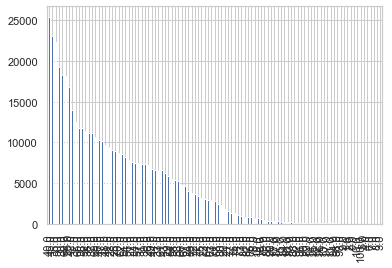

In [25]:
working_data['age'].value_counts().plot.bar()

# Splitting Features and Target Variable

In [26]:
# Assigning X as a DataFrame for the features and y as a Series of the outcome variable, age
X = working_data.drop('age', axis = 1)
y = working_data['age']

# Exploring Household No

In [27]:
X['house_hold_no'].nunique()

33

In [28]:
sorted(X['house_hold_no'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 28,
 31,
 49,
 51,
 62,
 80,
 99]

In [29]:
X['house_hold_no'].isnull().sum()

0

In [30]:
X['house_hold_no'].value_counts()

1     417418
2      47145
3      14645
4       4856
5       1673
6        703
7        279
8        184
9         86
10        65
0         53
11        38
13        19
12        19
99        13
14         7
19         7
18         5
20         5
16         4
15         4
21         3
24         3
23         2
80         2
26         2
49         2
17         2
25         1
28         1
31         1
51         1
62         1
Name: house_hold_no, dtype: int64

In [31]:
X.loc[X['house_hold_no'] > 12, 'house_hold_no'] = 0
X['house_hold_no'].fillna(0, inplace = True)

In [32]:
X['house_hold_no'].value_counts()

1     417418
2      47145
3      14645
4       4856
5       1673
6        703
7        279
8        184
0        138
9         86
10        65
11        38
12        19
Name: house_hold_no, dtype: int64

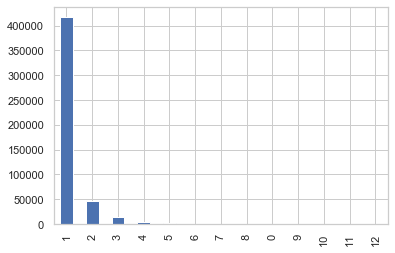

In [33]:
X['house_hold_no'].value_counts().plot.bar()

# Exploring Rural

In [34]:
X['rural'].nunique()

263

In [35]:
X['rural'].unique()

array([  1.,   2.,  51.,  48.,  13.,  67.,   4.,  47.,  49.,  57.,   6.,
        44.,  45.,  50.,  52.,  59.,  61.,  63.,  64.,  66.,  68.,  69.,
        71.,  73.,  76.,  78.,  80.,  82.,  83.,  85.,  86.,  96.,   3.,
         5.,   7.,   8.,  12.,  14.,  20.,  22.,  23.,  27.,  31.,  39.,
        40.,  42.,  46.,  53.,  55.,   9.,  10.,  11.,  15.,  16.,  18.,
        19.,  24.,  25.,  26.,  28.,  29.,  30.,  32.,  33.,  34.,  36.,
        37.,  38.,  41.,  54.,  56.,  35.,  43.,  58.,  21.,  62.,  65.,
        17.,  60.,  72.,  74.,  nan,  70.,  79.,  84.,  89.,  92., 100.,
       103., 104., 116., 120.,  77.,  88.,  90., 115., 124., 127.,  75.,
        81.,  87., 111., 113., 126.,  91.,  95.,  97., 107.,  98., 102.,
       105., 106., 125.,  93.,  94., 117., 118., 122., 179., 223., 178.,
       139., 128., 129., 132., 134., 135., 141., 142., 143., 144., 150.,
       151., 155., 157., 158., 159., 160., 161., 162., 164., 166., 168.,
       169., 170., 171., 172., 173., 174., 175., 17

In [36]:
X['rural'].isnull().sum()

12

In [37]:
X['rural'].value_counts()

1.0      415775
2.0       61158
42.0        184
46.0        181
45.0        174
          ...  
236.0         1
252.0         1
139.0         1
249.0         1
123.0         1
Name: rural, Length: 263, dtype: int64

In [38]:
#Making Rural a binary Category, 1 if rural, 0 for urban/not rural
X['rural'] = [0 if x == 2.0 else 1 for x in X['rural']]

In [39]:
X['rural'].value_counts()

1    426091
0     61158
Name: rural, dtype: int64

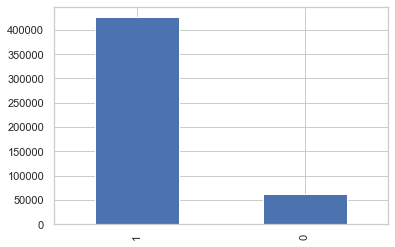

In [40]:
X['rural'].value_counts().plot.bar()

# Exploring Date of Death

In [41]:
viz_data_2['date_of_death'].nunique()

44

In [42]:
viz_data_2['date_of_death'].unique()

array([ 9.,  6., 22., 23., 17., 10., 13., 31., 12.,  0.,  2., 18.,  1.,
        4., 29., 24., 26., 28., 11.,  3., 21., 20.,  5., 15., 30., 14.,
        8., 16.,  7., 25., 27., 19., nan, 60., 91., 70., 50., 80., 88.,
       90., 55., 52., 76., 61., 71.])

In [43]:
viz_data_2['date_of_death'].isnull().sum()

4104

In [44]:
viz_data_2['date_of_death'].value_counts()

0.0     225681
10.0     13153
15.0     11735
20.0     11161
1.0      11002
12.0     10970
5.0      10801
2.0       9801
25.0      9231
8.0       9066
4.0       8860
6.0       8777
3.0       8690
7.0       8662
11.0      8406
9.0       8401
14.0      8355
17.0      8138
18.0      7923
13.0      7842
16.0      7746
22.0      7741
28.0      7529
26.0      7094
21.0      7086
27.0      6602
24.0      6450
19.0      6386
23.0      5902
29.0      5511
30.0      5359
31.0      3063
60.0         4
70.0         4
50.0         2
80.0         2
90.0         2
71.0         1
52.0         1
61.0         1
76.0         1
88.0         1
55.0         1
91.0         1
Name: date_of_death, dtype: int64

In [45]:
#Replacing all dates of death not between 1 and 31 with 0, for not available
viz_data_2['date_of_death'] = viz_data_2['date_of_death'].replace([60.0, 70.0, 50.0, 90.0, 80.0, 88.0, 
                                                 61.0, 76.0, 55.0, 71.0, 52.0, 91.0], 0.0)
viz_data_2['date_of_death'] = viz_data_2['date_of_death'].fillna(0)
viz_data_2['date_of_death'].head()

/Users/eddiecpognon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/eddiecpognon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0     9.0
1     6.0
2    22.0
3    23.0
4    17.0
Name: date_of_death, dtype: float64

In [46]:
viz_data_2['date_of_death'].value_counts()

0.0     229806
10.0     13153
15.0     11735
20.0     11161
1.0      11002
12.0     10970
5.0      10801
2.0       9801
25.0      9231
8.0       9066
4.0       8860
6.0       8777
3.0       8690
7.0       8662
11.0      8406
9.0       8401
14.0      8355
17.0      8138
18.0      7923
13.0      7842
16.0      7746
22.0      7741
28.0      7529
26.0      7094
21.0      7086
27.0      6602
24.0      6450
19.0      6386
23.0      5902
29.0      5511
30.0      5359
31.0      3063
Name: date_of_death, dtype: int64

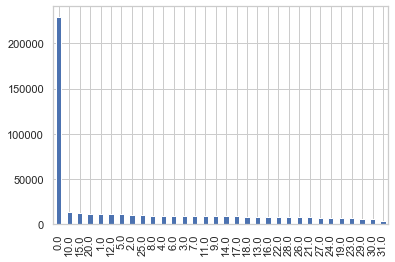

In [47]:
viz_data_2['date_of_death'].value_counts().plot.bar()

# Exploring Month of Death

In [48]:
viz_data_2['month_of_death'].nunique()

55

In [49]:
viz_data_2['month_of_death'].unique()

array([11.,  9.,  3.,  4., 10.,  7.,  8., 12.,  6.,  2.,  5.,  1.,  0.,
       nan, 13., 20., 18., 22., 19., 16., 32., 69., 52., 65., 26., 23.,
       28., 21., 25., 15., 29., 60., 80., 17., 14., 92., 73., 85., 62.,
       41., 89., 82., 58., 33., 27., 72., 90., 42., 96., 40., 74., 30.,
       24., 31., 70., 99.])

In [50]:
viz_data_2['month_of_death'].isnull().sum()

246

In [51]:
viz_data_2['month_of_death'].value_counts()

8.0     45604
1.0     43954
12.0    41905
10.0    39321
6.0     39289
11.0    38964
7.0     38287
2.0     38174
9.0     35767
3.0     34574
5.0     34251
4.0     33516
0.0     23104
22.0       39
20.0       28
32.0       19
16.0       19
15.0       19
13.0       16
14.0       12
18.0       11
19.0        9
17.0        8
25.0        8
28.0        8
92.0        8
21.0        7
82.0        6
62.0        6
30.0        6
29.0        5
23.0        5
27.0        5
52.0        5
26.0        4
24.0        4
72.0        4
69.0        3
42.0        3
31.0        3
58.0        3
65.0        3
90.0        2
74.0        2
73.0        2
80.0        2
33.0        1
41.0        1
40.0        1
70.0        1
85.0        1
99.0        1
60.0        1
96.0        1
89.0        1
Name: month_of_death, dtype: int64

In [52]:
#Replacing any month after 12 with 0 for not available
viz_data_2.loc[viz_data_2['month_of_death'] > 12, 'month_of_death'] = 0
viz_data_2['month_of_death'].fillna(0, inplace = True)

/Users/eddiecpognon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/eddiecpognon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/eddiecpognon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [53]:
viz_data_2['month_of_death'].value_counts()

8.0     45604
1.0     43954
12.0    41905
10.0    39321
6.0     39289
11.0    38964
7.0     38287
2.0     38174
9.0     35767
3.0     34574
5.0     34251
4.0     33516
0.0     23643
Name: month_of_death, dtype: int64

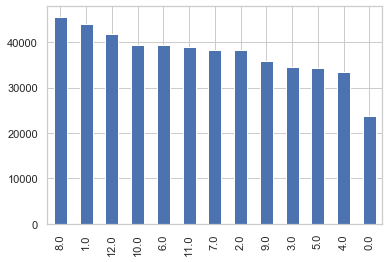

In [54]:
viz_data_2['month_of_death'].value_counts().plot.bar()

# Exploring Year of Death

In [55]:
viz_data_2['year_of_death'].nunique()

11

In [56]:
viz_data_2['year_of_death'].unique()

array([2011., 2009., 2008., 2007., 2012., 2010., 2013., 2002., 2006.,
       2005., 2004.,   nan])

In [57]:
viz_data_2['year_of_death'].isnull().sum()

27

In [58]:
#Replacing any null values with 0 for not available
viz_data_2['year_of_death'].fillna(0, inplace = True)

In [59]:
viz_data_2['year_of_death'].value_counts()

2008.0    106948
2009.0    105901
2007.0    105534
2011.0     90301
2010.0     78287
2012.0       233
0.0           27
2005.0         7
2006.0         5
2002.0         4
2013.0         1
2004.0         1
Name: year_of_death, dtype: int64

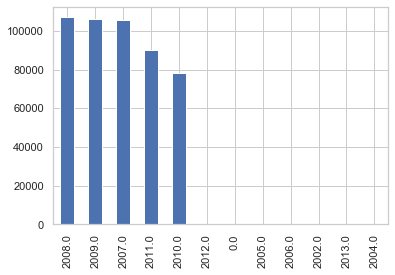

In [60]:
viz_data_2['year_of_death'].value_counts().plot.bar()

# Exploring Treatment Source

In [61]:
viz_data_2['treatment_source'].nunique()

65

In [62]:
viz_data_2['treatment_source'].unique()

array([ 0.,  6.,  8., 10.,  9.,  1.,  3.,  2., 99., 12., 11.,  7., nan,
        4.,  5., 60., 56., 33., 63., 69., 95., 16., 13., 19., 45., 14.,
       55., 85., 77., 62., 70., 61., 50., 73., 72., 47., 79., 82., 24.,
       57., 68., 75., 86., 64., 80., 67., 26., 65., 78., 30., 36., 54.,
       88., 52., 92., 71., 58., 66., 37., 40., 23., 48., 38., 59., 87.,
       98.])

In [63]:
viz_data_2['treatment_source'].isnull().sum()

13284

In [64]:
viz_data_2['treatment_source'].fillna(0, inplace = True)

In [65]:
viz_data_2['treatment_source'].value_counts()

0.0     126749
6.0      97626
8.0      70780
9.0      64115
12.0     33375
         ...  
98.0         1
13.0         1
54.0         1
38.0         1
19.0         1
Name: treatment_source, Length: 65, dtype: int64

In [66]:
#Binning the different types of treatment  
#(The treatments can be found in the the mortality dictionary)
bins = [0, 0.99, 7.99, 10.99, 11.99, 150]
group_id = [0, 1, 2, 3, 4]
viz_data_2['treatment_source'] = pd.cut(viz_data_2['treatment_source'], bins, labels = group_id)
viz_data_2['treatment_source'].fillna(0, inplace = True)
viz_data_2.head()

/Users/eddiecpognon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date_of_birth,date_of_death,month_of_death,month_of_birth,year_of_death,year_of_birth,is_death_associated_with_pregnan,injury_treatment_type,place_of_death,death_symptoms,sought_medical_care,water_filteration,toilet_used,treatment_source,drinking_water_source
0,NaN,9.0,11.0,NaN,2011.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0,NaN
1,10.0,6.0,9.0,10.0,2011.0,1983.0,NaN,0.0,1.0,NaN,NaN,1.0,5.0,0,1.0
2,24.0,22.0,3.0,7.0,2009.0,1964.0,0.0,0.0,1.0,0.0,NaN,NaN,2.0,1,1.0
3,0.0,23.0,11.0,0.0,2009.0,1959.0,0.0,0.0,1.0,0.0,NaN,1.0,1.0,1,1.0
4,2.0,17.0,4.0,7.0,2011.0,1975.0,NaN,0.0,3.0,NaN,NaN,NaN,0.0,1,6.0


In [67]:
viz_data_2['treatment_source'].value_counts()

1    163639
2    140875
0    126749
4     52547
3      3439
Name: treatment_source, dtype: int64

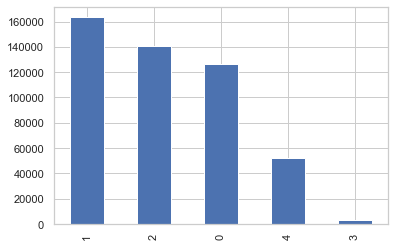

In [68]:
viz_data_2['treatment_source'].value_counts().plot.bar()

# Exploring Place of Death

In [69]:
viz_data_2['place_of_death'].nunique()

13

In [70]:
viz_data_2['place_of_death'].unique()

array([ 1.,  3.,  2.,  4.,  0., nan, 12.,  6.,  9., 99., 41.,  8., 11.,
        5.])

In [71]:
viz_data_2['place_of_death'].isnull().sum()

7809

In [72]:
#Creating groups for the different places of deaths (the places can be found in the data dictionary)
viz_data_2.loc[viz_data_2['place_of_death'] > 4, 'place_of_death'] = 4
viz_data_2['place_of_death'].fillna(4, inplace = True)
viz_data_2['place_of_death'].replace(0,4, inplace = True)

/Users/eddiecpognon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/eddiecpognon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/eddiecpognon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

# Exploring Death and Pregnancy

In [73]:
viz_data_2['is_death_associated_with_pregnan'].nunique()

3

In [74]:
viz_data_2['is_death_associated_with_pregnan'].unique()

array([nan,  0.,  2.,  1.])

In [75]:
viz_data_2['is_death_associated_with_pregnan'].isnull().sum()

231118

In [76]:
viz_data_2['is_death_associated_with_pregnan'].fillna(2, inplace = True)

In [77]:
viz_data_2['is_death_associated_with_pregnan'].value_counts()

2.0    267735
0.0    214609
1.0      4905
Name: is_death_associated_with_pregnan, dtype: int64

In [78]:
#Making pregnancy associated deaths binary (1 for yes, 0 for no/else)
viz_data_2['is_death_associated_with_pregnan'].replace(2.0, 0, inplace = True)

In [79]:
viz_data_2['is_death_associated_with_pregnan'].value_counts()

0.0    482344
1.0      4905
Name: is_death_associated_with_pregnan, dtype: int64

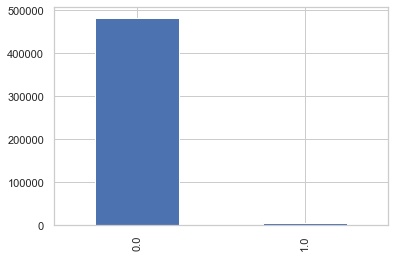

In [80]:
viz_data_2['is_death_associated_with_pregnan'].value_counts().plot.bar()

# Exploring Death Symptoms

In [81]:
viz_data_2['death_symptoms'].nunique()

20

In [82]:
viz_data_2['death_symptoms'].unique()

array([nan,  0., 10.,  1.,  7., 15., 11.,  8.,  9., 13., 12.,  3.,  5.,
       14.,  6.,  2.,  4., 16., 17., 21., 99.])

In [83]:
viz_data_2['death_symptoms'].isnull().sum()

383854

In [84]:
#Binning the different death symptoms (The symptoms are located in the data dictionary)
viz_data_2.loc[viz_data_2['death_symptoms'] > 9, 'death_symptoms'] = 0
viz_data_2['death_symptoms'].fillna(0, inplace = True)

In [85]:
viz_data_2['death_symptoms'].replace(9, 0, inplace = True)

In [86]:
viz_data_2['death_symptoms'].value_counts()

0.0    459769
1.0      6888
3.0      5132
2.0      4279
8.0      3000
6.0      2952
5.0      2758
4.0      1684
7.0       787
Name: death_symptoms, dtype: int64

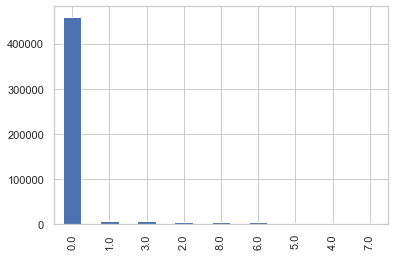

In [87]:
viz_data_2['death_symptoms'].value_counts().plot.bar()

# Exploring Sex

In [88]:
X['sex'].nunique()

2

In [89]:
X['sex'].unique()

array([nan,  1.,  2.])

In [90]:
X['sex'].isnull().sum()

8920

In [91]:
X['sex'].fillna(2.0, inplace = True)

In [92]:
X['sex'].value_counts()

1.0    368713
2.0    118536
Name: sex, dtype: int64

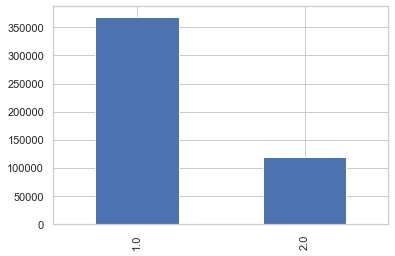

In [93]:
X['sex'].value_counts().plot.bar()

# Exploring Usual Residence

In [94]:
X['usual_residance'].nunique()

2

In [95]:
X['usual_residance'].unique()

array([nan,  1.,  2.])

In [96]:
X['usual_residance'].isnull().sum()

25509

In [97]:
X['usual_residance'].fillna(2, inplace = True)

In [98]:
#Making usual residence Binary (1 for yes, 2 for no)
X['usual_residance'].value_counts()

1.0    461738
2.0     25511
Name: usual_residance, dtype: int64

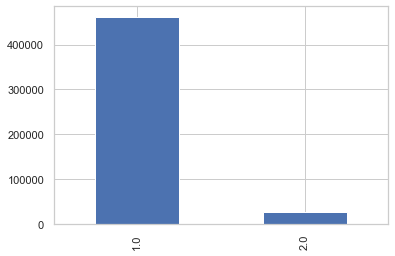

In [99]:
X['usual_residance'].value_counts().plot.bar()

# Exploring Date of Birth

In [100]:
viz_data_2['date_of_birth'].nunique()

33

In [101]:
viz_data_2['date_of_birth'].unique()

array([ nan,  10.,  24.,   0.,   2.,  17.,   6.,  22.,  13.,  23.,  15.,
        20.,   3.,  25.,  12.,  18.,   1.,   4.,  28.,   9.,   7.,  11.,
        30.,  26.,  16.,   5.,   8.,  19.,  14.,  21.,  27.,  29.,  31.,
       110.])

In [102]:
viz_data_2['date_of_birth'].isnull().sum()

8934

In [103]:
#Replacing any date above 31 woth 0 for not available
viz_data_2['date_of_birth'].fillna(0, inplace = True)
viz_data_2['date_of_birth'].replace(110, 0, inplace = True)

In [104]:
viz_data_2['date_of_birth'].value_counts()

0.0     386024
1.0       8888
15.0      6471
12.0      6363
10.0      5848
11.0      4316
5.0       4278
20.0      4276
2.0       4000
18.0      3515
17.0      3357
25.0      3259
3.0       3229
16.0      3225
4.0       3200
6.0       3083
14.0      3082
7.0       3027
21.0      3018
13.0      2615
8.0       2585
22.0      2464
9.0       2404
19.0      2383
24.0      1955
28.0      1943
27.0      1888
26.0      1706
23.0      1556
30.0      1443
29.0      1034
31.0       814
Name: date_of_birth, dtype: int64

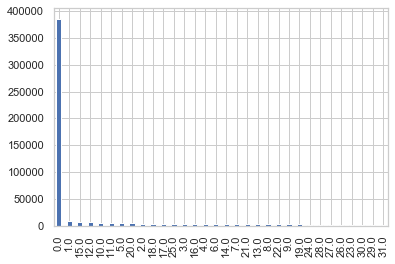

In [105]:
viz_data_2['date_of_birth'].value_counts().plot.bar()

# Exploring Month of Birth

In [106]:
viz_data_2['month_of_birth'].nunique()

13

In [107]:
viz_data_2['month_of_birth'].unique()

array([nan, 10.,  7.,  0.,  9.,  1., 12.,  5.,  4.,  6.,  3.,  2.,  8.,
       11.])

In [108]:
viz_data_2['month_of_birth'].isnull().sum()

8933

In [109]:
#Replacing any month above 12 with 0 for not available
viz_data_2['month_of_birth'].fillna(0, inplace = True)

In [110]:
viz_data_2['month_of_birth'].value_counts()

0.0     293314
6.0      22289
4.0      21323
5.0      20181
3.0      18870
7.0      18155
2.0      17384
1.0      16769
8.0      15387
9.0      12647
10.0     12172
12.0      9467
11.0      9291
Name: month_of_birth, dtype: int64

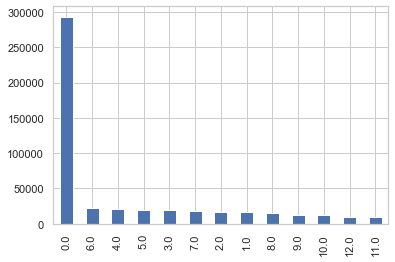

In [111]:
viz_data_2['month_of_birth'].value_counts().plot.bar()

# Exploring Year of Birth

In [112]:
viz_data_2['year_of_birth'].nunique()

102

In [113]:
viz_data_2['year_of_birth'].unique()

array([  nan, 1983., 1964., 1959., 1975., 1954., 1947., 1960., 1956.,
       1981., 1971., 1949., 1974., 1941., 1953., 1961., 1958., 1939.,
       1979., 1946., 1969., 1944., 1962., 1963., 1972., 1966., 1957.,
       1990., 1940., 1951., 1968., 1982., 1977., 1980., 1973., 1976.,
       1984., 1989., 1931., 1995., 1935., 1943., 1967., 1932., 1965.,
       1936., 1978., 1937., 1942., 1948., 1938., 1970., 1986., 1934.,
       1933., 1945., 1952., 1985., 1921., 1955., 1924., 1927., 1930.,
       1988., 1987., 1929., 1913., 1928., 1950., 1919., 1993., 1926.,
       1914., 1922., 1992., 1923., 1925., 1999., 1991., 1912., 1918.,
       1910., 1915., 1997., 1911., 1917., 1920., 1994., 2000., 1996.,
       1998., 2006., 1916., 2005., 2011., 2008., 2010., 2002., 2001.,
       2007., 2003., 2004., 2009.])

In [114]:
viz_data_2['year_of_birth'].isnull().sum()

8922

In [115]:
#Replacing null values with 0 for not available
viz_data_2['year_of_birth'].fillna(0, inplace = True)

In [116]:
viz_data_2['year_of_birth'].value_counts()

1969.0    32504
1964.0    30722
1974.0    29478
1949.0    25171
1959.0    24714
          ...  
2003.0        8
2005.0        8
2010.0        3
2004.0        3
2011.0        2
Name: year_of_birth, Length: 103, dtype: int64

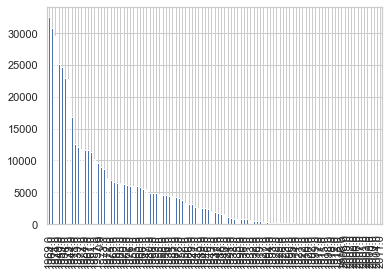

In [117]:
viz_data_2['year_of_birth'].value_counts().plot.bar()

# Exploring Marital Status

In [118]:
X['marital_status'].nunique()

8

In [119]:
X['marital_status'].unique()

array([nan,  3.,  5.,  4.,  1.,  7.,  2.,  8.,  6.])

In [120]:
X['marital_status'].isnull().sum()

8921

In [121]:
X['marital_status'].fillna(0, inplace = True)

In [122]:
#Binning marital status to represent the different statuses (See data dictionary for more information)
X['marital_status'].replace(1, 0, inplace = True)
X['marital_status'].replace([2, 3, 4], 1, inplace = True)
X['marital_status'].replace([6, 7], 2, inplace = True)
X['marital_status'].replace(5, 3, inplace = True)
X['marital_status'].replace(8, 4, inplace = True)

In [123]:
X['marital_status'].value_counts()

1.0    352290
3.0    112409
0.0     20111
2.0      2405
4.0        34
Name: marital_status, dtype: int64

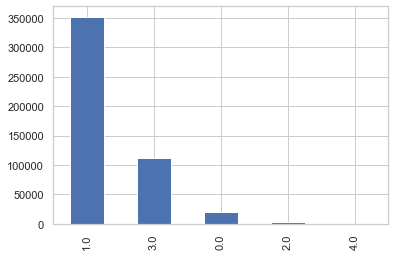

In [124]:
X['marital_status'].value_counts().plot.bar()

# Exploring Highest Level of Education

In [125]:
X['highest_qualification'].nunique()

10

In [126]:
X['highest_qualification'].unique()

array([nan,  4.,  8.,  3.,  0.,  6.,  7.,  2.,  5.,  1.,  9.])

In [127]:
X['highest_qualification'].isnull().sum()

10388

In [128]:
#Filling in null values with 0 for not applicable
#(See data dictionary for the the various levels of education)
X['highest_qualification'].fillna(0, inplace = True)

In [129]:
X['highest_qualification'].value_counts()

0.0    187616
4.0     66795
3.0     59802
2.0     49123
5.0     42797
1.0     35613
6.0     21695
7.0     17371
8.0      5661
9.0       776
Name: highest_qualification, dtype: int64

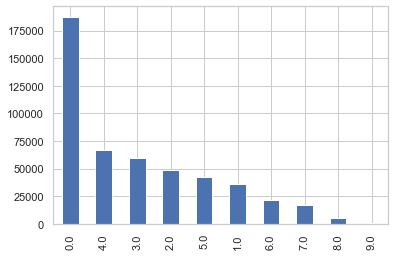

In [130]:
X['highest_qualification'].value_counts().plot.bar()

# Exploring Occupation Status

In [131]:
X['occupation_status'].nunique()

16

In [132]:
X['occupation_status'].unique()

array([nan,  1.,  4., 10., 13.,  7., 15.,  5.,  3.,  2.,  8., 16.,  9.,
       12.,  6., 11., 14.])

In [133]:
X['occupation_status'].isnull().sum()

10521

In [134]:
#Binning occupation status to represent the different statuses (See data dictionary for more information)
X['occupation_status'].replace([8, 9, 10, 11, 12, 13, 14, 15], 0, inplace = True)
X['occupation_status'].replace(2, 1, inplace = True)
X['occupation_status'].replace([3, 4, 5, 6, 7], 2, inplace = True)
X['occupation_status'].replace(16, 3, inplace = True)

In [135]:
X['occupation_status'].fillna(4, inplace = True)

In [136]:
X['occupation_status'].value_counts()

2.0    208482
1.0    147865
0.0    115560
4.0     10521
3.0      4821
Name: occupation_status, dtype: int64

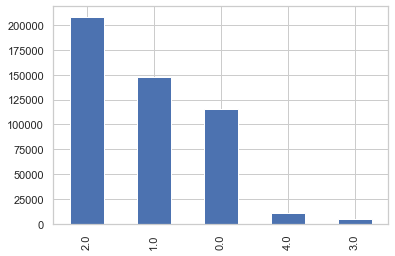

In [137]:
X['occupation_status'].value_counts().plot.bar()

# Exploring Disability Status

In [138]:
X['disability_status'].nunique()

8

In [139]:
X['disability_status'].unique()

array([nan,  0.,  5.,  1.,  6.,  2.,  7.,  3.,  4.])

In [140]:
X['disability_status'].isnull().sum()

10333

In [141]:
#Filling in null values with 0 for not applicable (See the data dictionary for more information)
X['disability_status'].fillna(0, inplace = True)

In [142]:
X['disability_status'].value_counts()

0.0    476530
5.0      4032
2.0      2551
3.0      1431
1.0      1140
6.0       864
4.0       423
7.0       278
Name: disability_status, dtype: int64

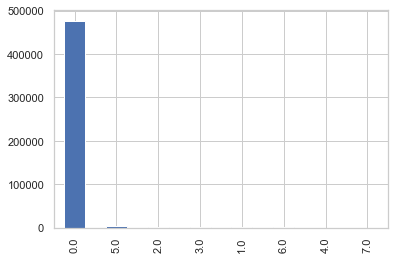

In [143]:
X['disability_status'].value_counts().plot.bar()

# Exploring Injury Treatment Type

In [144]:
viz_data_2['injury_treatment_type'].nunique()

8

In [145]:
viz_data_2['injury_treatment_type'].unique()

array([nan,  0.,  3.,  4.,  5.,  2.,  6.,  1.,  7.])

In [146]:
viz_data_2['injury_treatment_type'].isnull().sum()

10334

In [147]:
#Filling in null values with 0 for not applicable
#(See data dictionary for the the various injury treatment types)
viz_data_2['injury_treatment_type'].fillna(0, inplace = True)

In [148]:
viz_data_2['injury_treatment_type'].value_counts()

0.0    471238
5.0      7269
7.0      3219
4.0      1605
2.0      1518
3.0       901
6.0       888
1.0       611
Name: injury_treatment_type, dtype: int64

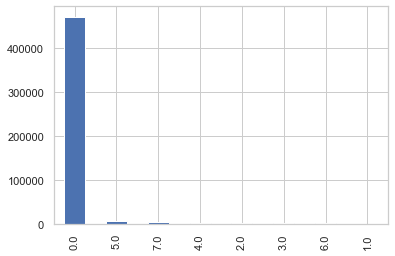

In [149]:
viz_data_2['injury_treatment_type'].value_counts().plot.bar()

# Exploring Sought Medical Care

In [150]:
viz_data_2['sought_medical_care'].nunique()

5

In [151]:
viz_data_2['sought_medical_care'].unique()

array([nan,  1.,  2.,  3.,  6.,  0.])

In [152]:
viz_data_2['sought_medical_care'].isnull().sum()

398709

In [153]:
viz_data_2['sought_medical_care'].fillna(3, inplace = True)

In [154]:
viz_data_2['sought_medical_care'].value_counts()

3.0    411628
2.0     50448
1.0     25116
6.0        55
0.0         2
Name: sought_medical_care, dtype: int64

In [155]:
viz_data_2['sought_medical_care'].replace([0, 1, 2, 6], 1, inplace = True)

In [156]:
#Making sought medical care binary (1 for yes, 2 for no)
viz_data_2['sought_medical_care'].replace(3, 2, inplace = True)

In [157]:
viz_data_2['sought_medical_care'].value_counts()

2.0    411628
1.0     75621
Name: sought_medical_care, dtype: int64

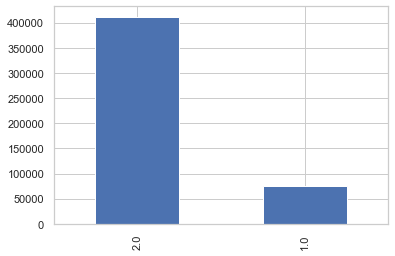

In [158]:
viz_data_2['sought_medical_care'].value_counts().plot.bar()

# Exploring Chew

In [159]:
X['chew'].nunique()

8

In [160]:
X['chew'].unique()

array([nan,  3.,  7.,  5.,  6.,  0.,  1.,  2.,  4.])

In [161]:
X['chew'].isnull().sum()

24664

In [162]:
#Filling in null values with 0 for not applicable
#(See data dictionary for the the various forms of chewing tobacco)
X['chew'].fillna(0.0, inplace = True)

In [163]:
X['chew'].value_counts()

7.0    216257
5.0    134699
1.0     49081
0.0     26963
2.0     26388
3.0     24115
4.0      5761
6.0      3985
Name: chew, dtype: int64

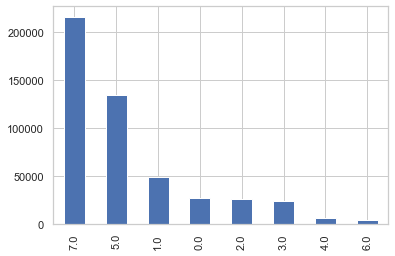

In [164]:
X['chew'].value_counts().plot.bar()

# Exploring Smoke

In [165]:
X['smoke'].nunique()

5

In [166]:
X['smoke'].unique()

array([nan,  4.,  2.,  1.,  3.,  0.])

In [167]:
X['smoke'].isnull().sum()

24665

In [168]:
#Filling in null values with 0 for not applicable
#(See data dictionary for the the various smoking habits)
X['smoke'].fillna(0.0, inplace = True)

In [169]:
X['smoke'].value_counts()

4.0    355370
1.0     63021
2.0     34292
0.0     27474
3.0      7092
Name: smoke, dtype: int64

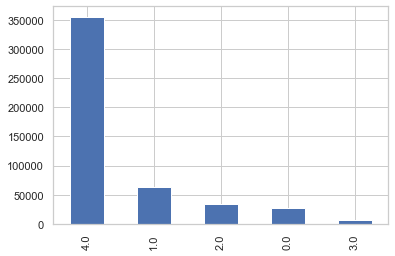

In [170]:
X['smoke'].value_counts().plot.bar()

# Exploring Alcohol

In [171]:
X['alcohol'].nunique()

5

In [172]:
X['alcohol'].unique()

array([nan,  2.,  4.,  3.,  1.,  0.])

In [173]:
X['alcohol'].isnull().sum()

24706

In [174]:
#Filling in null values with 0 for not applicable
#(See data dictionary for the the various alcohol drinking habits)
X['alcohol'].fillna(0.0, inplace = True)

In [175]:
X['alcohol'].value_counts()

4.0    328457
2.0     87471
1.0     35070
0.0     27499
3.0      8752
Name: alcohol, dtype: int64

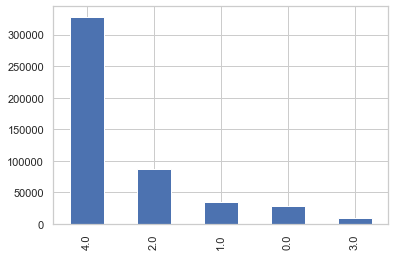

In [176]:
X['alcohol'].value_counts().plot.bar()

# Exploring Owner Status

In [177]:
X['owner_status'].nunique()

4

In [178]:
X['owner_status'].unique()

array([nan,  1.,  2.,  3.,  4.])

In [179]:
X['owner_status'].isnull().sum()

22498

In [180]:
#Filling in null values with 0 for not applicable
#(See data dictionary for the the various levels of ownership)
X['owner_status'].fillna(0.0, inplace = True)

In [181]:
X['owner_status'].value_counts()

1.0    438687
0.0     22498
2.0     15891
3.0     10172
4.0         1
Name: owner_status, dtype: int64

In [182]:
X['owner_status'].replace([0.0, 4.0],3.0, inplace = True)

In [183]:
X['owner_status'].value_counts()

1.0    438687
3.0     32671
2.0     15891
Name: owner_status, dtype: int64

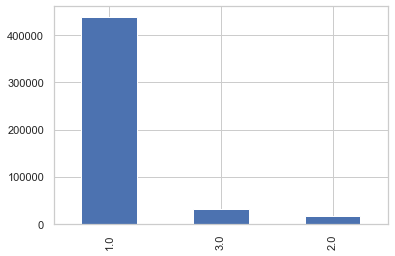

In [184]:
X['owner_status'].value_counts().plot.bar()

# Exploring Drinking Water Source

In [185]:
viz_data_2['drinking_water_source'].nunique()

9

In [186]:
viz_data_2['drinking_water_source'].unique()

array([nan,  1.,  6.,  2.,  9.,  3.,  8.,  4.,  7.,  5.])

In [187]:
viz_data_2['drinking_water_source'].isnull().sum()

22499

In [188]:
#Filling in null values with 9 for not applicable
#(See data dictionary for the the various water drinking patterns)
viz_data_2['drinking_water_source'].fillna(9.0, inplace = True)

In [189]:
viz_data_2['drinking_water_source'].value_counts()

3.0    244612
2.0     56812
6.0     56793
1.0     44871
4.0     30912
9.0     28642
8.0     14560
5.0      5184
7.0      4863
Name: drinking_water_source, dtype: int64

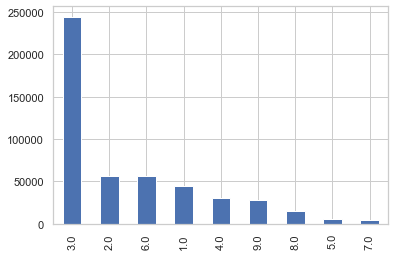

In [190]:
viz_data_2['drinking_water_source'].value_counts().plot.bar()

# Exploring Is Water Filtered

In [191]:
X['is_water_filter'].nunique()

2

In [192]:
X['is_water_filter'].unique()

array([nan,  1.,  2.])

In [193]:
X['is_water_filter'].isnull().sum()

22498

In [194]:
#Making 'Is water filtered?' binary (1 for yes, 2 for no)
X['is_water_filter'].fillna(2.0, inplace = True)

In [195]:
X['is_water_filter'].value_counts()

2.0    383435
1.0    103814
Name: is_water_filter, dtype: int64

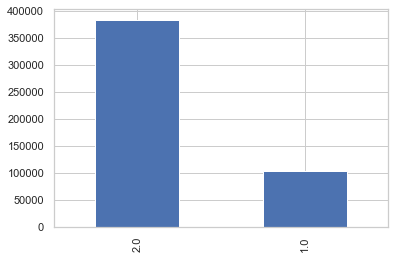

In [196]:
X['is_water_filter'].value_counts().plot.bar()

# Exploring Is Water Filtration

In [197]:
viz_data_2['water_filteration'].nunique()

8

In [198]:
viz_data_2['water_filteration'].unique()

array([nan,  1.,  5.,  6.,  2.,  7.,  4.,  3.,  8.])

In [199]:
viz_data_2['water_filteration'].isnull().sum()

383448

In [200]:
#Filling in null values with 8 for not applicable
#(See data dictionary for the the various water filtration habits)
viz_data_2['water_filteration'].fillna(8.0, inplace = True)

In [201]:
viz_data_2['water_filteration'].value_counts()

8.0    384818
4.0     49636
5.0     24519
1.0     12346
2.0      7444
7.0      3742
6.0      3604
3.0      1140
Name: water_filteration, dtype: int64

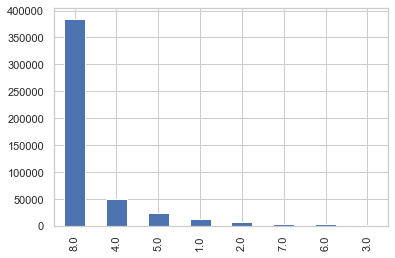

In [202]:
viz_data_2['water_filteration'].value_counts().plot.bar()

# Exploring Is Toilet Used

In [203]:
viz_data_2['toilet_used'].nunique()

10

In [204]:
viz_data_2['toilet_used'].unique()

array([nan,  5.,  2.,  1.,  0.,  6.,  3.,  9.,  7.,  4.,  8.])

In [205]:
viz_data_2['toilet_used'].isnull().sum()

22140

In [206]:
#Filling in null values with 0 for not applicable
#(See data dictionary for the the various toilet uses practices)
viz_data_2['toilet_used'].fillna(0, inplace = True)

In [207]:
viz_data_2['toilet_used'].value_counts()

0.0    329221
2.0     69059
3.0     24444
7.0     23386
6.0     23315
1.0      9162
5.0      5439
4.0      1898
9.0       996
8.0       329
Name: toilet_used, dtype: int64

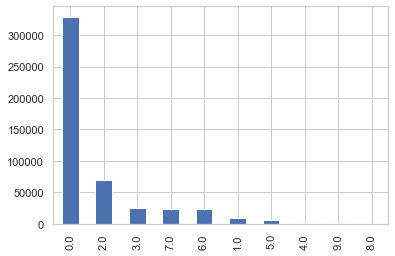

In [208]:
viz_data_2['toilet_used'].value_counts().plot.bar()

# Exploring Is Toilet Shared

In [209]:
X['is_toilet_shared'].nunique()

3

In [210]:
X['is_toilet_shared'].unique()

array([nan,  2.,  1., 10.])

In [211]:
X['is_toilet_shared'].isnull().sum()

329338

In [212]:
#Making 'Is toilet shared?' binary (1 for yes, 2 for no)
X['is_toilet_shared'].fillna(2.0, inplace = True)

In [213]:
X['is_toilet_shared'].value_counts()

2.0     453627
1.0      33616
10.0         6
Name: is_toilet_shared, dtype: int64

In [214]:
X['is_toilet_shared'].replace(10.0, 2.0, inplace = True)

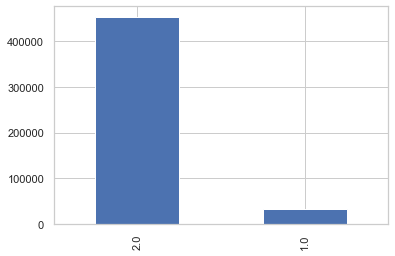

In [215]:
X['is_toilet_shared'].value_counts().plot.bar()

# Exploring Electricity

In [216]:
X['household_have_electricity'].nunique()

2

In [217]:
X['household_have_electricity'].unique()

array([nan,  1.,  2.])

In [218]:
X['household_have_electricity'].isnull().sum()

22498

In [219]:
#Making 'Does household have electricity?' binary (1 for yes, 2 for no)
X['household_have_electricity'].fillna(2, inplace = True)

In [220]:
X['household_have_electricity'].value_counts()

1.0    278955
2.0    208294
Name: household_have_electricity, dtype: int64

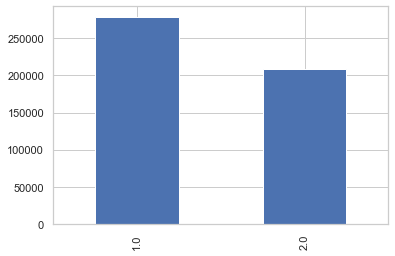

In [221]:
X['household_have_electricity'].value_counts().plot.bar()

# Exploring Lighting Source

In [222]:
X['lighting_source'].nunique()

6

In [223]:
X['lighting_source'].unique()

array([nan,  1.,  6.,  2.,  4.,  3.,  5.])

In [224]:
X['lighting_source'].isnull().sum()

22498

In [225]:
#Filling in null values with 6 for not applicable
#(See data dictionary for the the various sources of lighting)
X['lighting_source'].fillna(6, inplace = True)

In [226]:
X['lighting_source'].value_counts()

2.0    239928
1.0    217564
6.0     23565
3.0      4163
5.0      1457
4.0       572
Name: lighting_source, dtype: int64

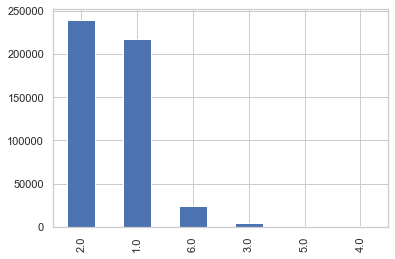

In [227]:
X['lighting_source'].value_counts().plot.bar()

# Exploring Cooking Fuel

In [228]:
X['cooking_fuel'].nunique()

10

In [229]:
X['cooking_fuel'].unique()

array([nan,  1.,  6.,  2.,  7.,  4.,  3.,  5.,  0.,  8.,  9.])

In [230]:
X['cooking_fuel'].isnull().sum()

22140

In [231]:
#Filling in null values with 1 for not firewood
#(See data dictionary for the various cooking fuels)
X['cooking_fuel'].fillna(1, inplace = True)

In [232]:
X['cooking_fuel'].value_counts()

1.0    305682
2.0     55964
6.0     53194
3.0     50098
4.0     13068
9.0      3466
0.0      2452
5.0      1780
7.0      1128
8.0       417
Name: cooking_fuel, dtype: int64

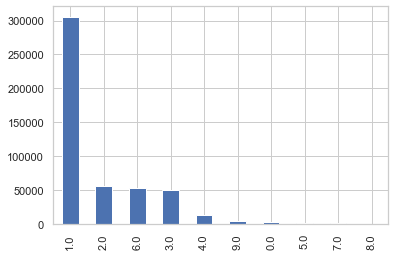

In [233]:
X['cooking_fuel'].value_counts().plot.bar()

# Exploring Kitchen Availability

In [234]:
X['kitchen_availability'].nunique()

5

In [235]:
X['kitchen_availability'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.])

In [236]:
X['kitchen_availability'].isnull().sum()

22498

In [237]:
X['kitchen_availability'].fillna(5, inplace = True)

In [238]:
X['kitchen_availability'].value_counts()

1.0    195758
2.0    168264
3.0     62909
4.0     37418
5.0     22900
Name: kitchen_availability, dtype: int64

In [239]:
#Filling in null values with 5 for not applicable
#(See data dictionary for the different kitchen availabilty statuses)
X['kitchen_availability'].replace(2, 4, inplace = True)

In [240]:
X['kitchen_availability'].value_counts()

4.0    205682
1.0    195758
3.0     62909
5.0     22900
Name: kitchen_availability, dtype: int64

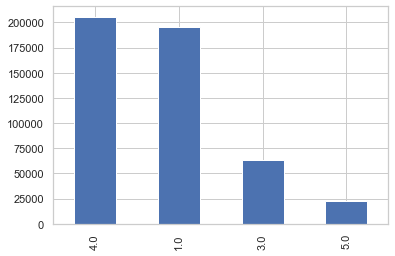

In [241]:
X['kitchen_availability'].value_counts().plot.bar()

# Exploring Fridge

In [242]:
X['is_refrigerator'].nunique()

2

In [243]:
X['is_refrigerator'].unique()

array([nan,  2.,  1.])

In [244]:
X['is_refrigerator'].isnull().sum()

22498

In [245]:
#Making 'has fridge' binary (1 for yes, 2 for no)
X['is_refrigerator'].fillna(2, inplace = True)

In [246]:
X['is_refrigerator'].value_counts()

2.0    450252
1.0     36997
Name: is_refrigerator, dtype: int64

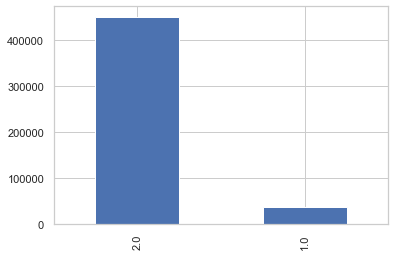

In [247]:
X['is_refrigerator'].value_counts().plot.bar()

# Exploring If Covered by Health

In [248]:
X['iscoveredbyhealthscheme'].nunique()

4

In [249]:
X['iscoveredbyhealthscheme'].unique()

array([nan,  2.,  1.,  3.,  0.])

In [250]:
X['iscoveredbyhealthscheme'].isnull().sum()

324845

In [251]:
X['iscoveredbyhealthscheme'].fillna(2, inplace = True)

In [252]:
X['iscoveredbyhealthscheme'].value_counts()

2.0    444387
1.0     35053
3.0      7666
0.0       143
Name: iscoveredbyhealthscheme, dtype: int64

In [253]:
#Filling in null values with 0 for not applicable
#(See data dictionary for the the various healthcare statuses)
X['iscoveredbyhealthscheme'].replace(0, 2, inplace = True)

In [254]:
X['iscoveredbyhealthscheme'].value_counts()

2.0    444530
1.0     35053
3.0      7666
Name: iscoveredbyhealthscheme, dtype: int64

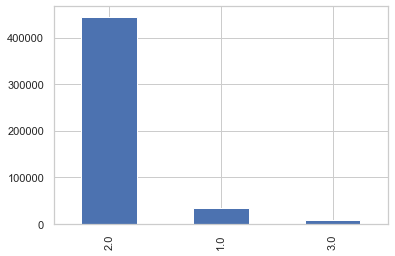

In [255]:
X['iscoveredbyhealthscheme'].value_counts().plot.bar()

# Exploring Illness Type

In [256]:
viz_data_2['illness_type'] = data['illness_type']

/Users/eddiecpognon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [257]:
viz_data_2['illness_type'].nunique()

10

In [258]:
viz_data_2['illness_type'].unique()

array([nan,  0.,  9.,  3.,  7.,  5.,  1.,  6.,  2.,  4.,  8.])

In [259]:
viz_data_2['illness_type'].isnull().sum()

10332

In [260]:
viz_data_2['illness_type'].fillna(0, inplace = True)

In [261]:
#Filled in null values with 0 for not applicable
#(See data dictionary for the the various illness types)
viz_data_2['illness_type'].replace([5, 6, 7], 4, inplace = True)
viz_data_2['illness_type'].replace(8, 5, inplace = True)
viz_data_2['illness_type'].replace(9, 6, inplace = True)

In [262]:
viz_data_2['illness_type'].value_counts()

0.0    440247
4.0     25808
3.0     10433
6.0      5475
1.0      3085
2.0      2001
5.0       200
Name: illness_type, dtype: int64

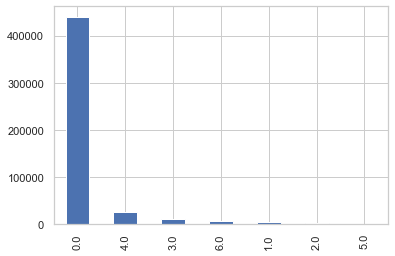

In [263]:
viz_data_2['illness_type'].value_counts().plot.bar()

In [264]:
viz_data_2.isnull().sum()

date_of_birth                       0
date_of_death                       0
month_of_death                      0
month_of_birth                      0
year_of_death                       0
year_of_birth                       0
is_death_associated_with_pregnan    0
injury_treatment_type               0
place_of_death                      0
death_symptoms                      0
sought_medical_care                 0
water_filteration                   0
toilet_used                         0
treatment_source                    0
drinking_water_source               0
illness_type                        0
dtype: int64

In [265]:
X.drop(['Unnamed: 0', 'Unnamed: 0.1', 'illness_type'], axis = 1, inplace = True) 

In [266]:
X.isnull().sum()

house_hold_no                 0
state                         0
district                      0
rural                         0
sex                           0
usual_residance               0
marital_status                0
highest_qualification         0
occupation_status             0
disability_status             0
chew                          0
smoke                         0
alcohol                       0
owner_status                  0
is_water_filter               0
is_toilet_shared              0
household_have_electricity    0
lighting_source               0
cooking_fuel                  0
kitchen_availability          0
is_refrigerator               0
iscoveredbyhealthscheme       0
dtype: int64

In [267]:
X['y'] = y

In [268]:
#Testing Data Set
X.to_csv('testing_dataset.csv')

In [269]:
viz_data_2['y'] = y

/Users/eddiecpognon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [270]:
viz_data_2.columns

Index(['date_of_birth', 'date_of_death', 'month_of_death', 'month_of_birth',
       'year_of_death', 'year_of_birth', 'is_death_associated_with_pregnan',
       'injury_treatment_type', 'place_of_death', 'death_symptoms',
       'sought_medical_care', 'water_filteration', 'toilet_used',
       'treatment_source', 'drinking_water_source', 'illness_type', 'y'],
      dtype='object')

In [271]:
viz_data_2.to_csv('viz2_dataset.csv')

# Exploring Religion

In [272]:
viz_data['religion'].nunique()

8

In [273]:
viz_data['religion'].unique()

array([nan,  1.,  2.,  4.,  5.,  3.,  6.,  7.,  8.])

In [274]:
viz_data['religion'].isnull().sum()

8921

In [275]:
#Filling in null values with 0 for not applicable
viz_data['religion'].fillna(0, inplace = True)

In [276]:
viz_data['religion'].value_counts()

1.0    405302
2.0     52806
3.0     10452
0.0      8921
7.0      7256
4.0      1779
6.0       453
5.0       264
8.0        16
Name: religion, dtype: int64

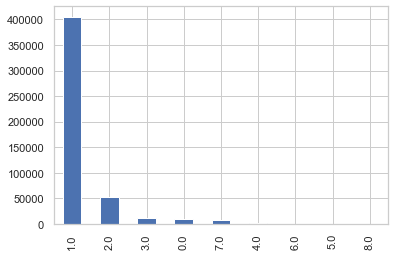

In [277]:
viz_data['religion'].value_counts().plot.bar()

# Exploring Date of Marriage

In [278]:
viz_data['date_of_marriage'].nunique()

33

In [279]:
viz_data['date_of_marriage'].unique()

array([      nan, 1.900e+01, 8.000e+00, 0.000e+00, 1.200e+01, 2.700e+01,
       4.000e+00, 1.000e+01, 2.000e+00, 3.000e+00, 1.400e+01, 2.000e+01,
       3.100e+01, 2.100e+01, 1.100e+01, 6.000e+00, 7.000e+00, 9.000e+00,
       2.500e+01, 1.500e+01, 2.200e+01, 2.800e+01, 2.300e+01, 1.300e+01,
       1.600e+01, 2.600e+01, 1.800e+01, 1.700e+01, 5.000e+00, 1.000e+00,
       2.400e+01, 3.000e+01, 2.900e+01, 1.009e+03])

In [280]:
viz_data['date_of_marriage'].isnull().sum()

10143

In [281]:
#Filling in null values with 0 for not applicable
viz_data['date_of_marriage'].fillna(0, inplace = True)

In [282]:
viz_data['date_of_marriage'].replace(1009, 0, inplace = True)

In [283]:
viz_data['date_of_marriage'].value_counts()

0.0     360468
12.0      7805
10.0      6428
15.0      6257
20.0      5747
11.0      5368
5.0       5091
18.0      4974
14.0      4751
1.0       4416
25.0      4402
16.0      4391
17.0      4369
6.0       4266
2.0       4248
22.0      4082
13.0      4071
4.0       4033
21.0      4030
7.0       3814
3.0       3705
8.0       3575
19.0      3549
28.0      3414
9.0       3384
24.0      3220
27.0      3148
26.0      3072
23.0      2552
30.0      2005
29.0      1986
31.0       628
Name: date_of_marriage, dtype: int64

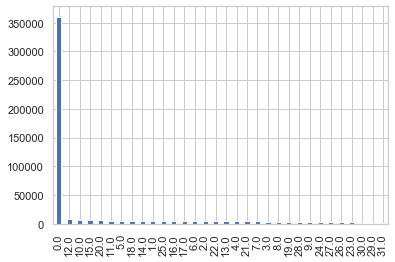

In [284]:
viz_data['date_of_marriage'].value_counts().plot.bar()

# Exploring Month of Marriage

In [285]:
viz_data['month_of_marriage'].nunique()

18

In [286]:
viz_data['month_of_marriage'].unique()

array([nan,  2., 12.,  0., 10.,  9.,  1.,  5.,  6.,  7., 11.,  4.,  3.,
        8., 19., 30., 27., 29., 21.])

In [287]:
viz_data['month_of_marriage'].isnull().sum()

10142

In [288]:
#Filling in null values with 0 for not applicable
viz_data['month_of_marriage'].fillna(0, inplace = True)

In [289]:
#Replacing months not between 1-12 with 0 for not applicaple
viz_data['month_of_marriage'].replace([19, 30, 27, 29, 21], 0, inplace = True)

In [290]:
viz_data['month_of_marriage'].value_counts()

0.0     174331
5.0      69515
4.0      60465
3.0      42279
6.0      42204
2.0      31818
7.0      17899
1.0      12910
12.0     10686
11.0      9160
10.0      6010
8.0       5579
9.0       4393
Name: month_of_marriage, dtype: int64

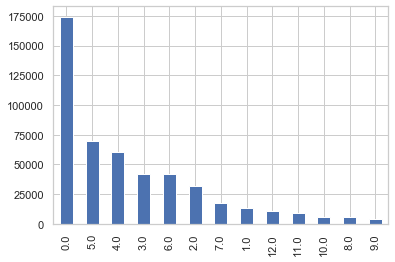

In [291]:
viz_data['month_of_marriage'].value_counts().plot.bar()

# Exploring Year of Marriage

In [292]:
viz_data['year_of_marriage'].nunique()

95

In [293]:
viz_data['year_of_marriage'].unique()

array([  nan, 2004., 1994., 1972., 1999., 1973., 1971., 1970., 1980.,
       1979., 1997., 1990., 1978., 1998., 1974., 1981., 1975., 1982.,
       1989., 1976., 1996., 2001., 1988., 2000., 1984., 1959., 1987.,
       1995., 1992., 1963., 1977., 1986., 1969., 2006.,    0., 1965.,
       1964., 2002., 1958., 1962., 1983., 1991., 1993., 1957., 1946.,
       2005., 1985., 1961., 1953., 1950., 2003., 1952., 1968., 1960.,
       1966., 2007., 1951., 1954., 1967., 1932., 1945., 1955., 1942.,
       1948., 2009., 2008., 1940., 2011., 1943., 1931., 1947., 1949.,
       1933., 1938., 1944., 1956., 1934., 1936., 1937., 2010., 1941.,
       1926., 1939., 1930.,  984., 1925., 1922., 1923., 1935., 1927.,
       1929., 1920., 1915., 1924., 1919., 1928.])

In [294]:
viz_data['year_of_marriage'].isnull().sum()

10648

In [295]:
#Filling in null values with 0 for not applicable
viz_data['year_of_marriage'].fillna(0, inplace = True)

In [296]:
viz_data['year_of_marriage'].replace(984, 0, inplace = True)

In [297]:
viz_data['year_of_marriage'].value_counts()

0.0       20147
1990.0    15717
1989.0    14014
1980.0    13753
2000.0    12742
          ...  
1919.0        4
1927.0        3
1920.0        3
1922.0        2
1915.0        1
Name: year_of_marriage, Length: 94, dtype: int64

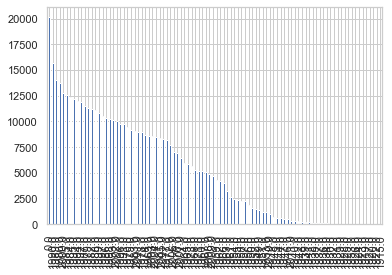

In [298]:
viz_data['year_of_marriage'].value_counts().plot.bar()

# Exploring Radio

In [299]:
viz_data['is_radio'].nunique()

2

In [300]:
viz_data['is_radio'].unique()

array([nan,  1.,  2.])

In [301]:
#Filling in null values with 0 for not applicable
viz_data['is_radio'].fillna(0, inplace = True)

In [302]:
viz_data['is_radio'].value_counts()

2.0    385545
1.0     79206
0.0     22498
Name: is_radio, dtype: int64

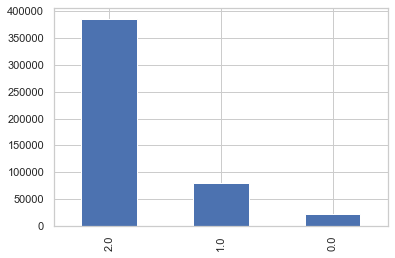

In [303]:
viz_data['is_radio'].value_counts().plot.bar()

# Exploring Television

In [304]:
viz_data['is_television'].nunique()

2

In [305]:
viz_data['is_television'].unique()

array([nan,  1.,  2.])

In [306]:
viz_data['is_television'].isnull().sum()

22498

In [307]:
#Filling in null values with 0 for not applicable
viz_data['is_television'].fillna(0, inplace = True)

In [308]:
viz_data['is_television'].value_counts()

2.0    334431
1.0    130320
0.0     22498
Name: is_television, dtype: int64

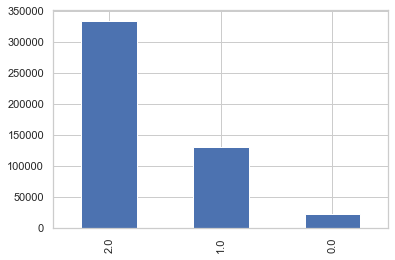

In [309]:
viz_data['is_television'].value_counts().plot.bar()

# Exploring Computer

In [310]:
viz_data['is_computer'].nunique()

3

In [311]:
viz_data['is_computer'].unique()

array([nan,  3.,  1.,  2.])

In [312]:
viz_data['is_computer'].isnull().sum()

22498

In [313]:
#Filling in null values with 0 for not applicable
viz_data['is_computer'].fillna(0, inplace = True)

In [314]:
viz_data['is_computer'].value_counts()

3.0    440989
0.0     22498
2.0     19310
1.0      4452
Name: is_computer, dtype: int64

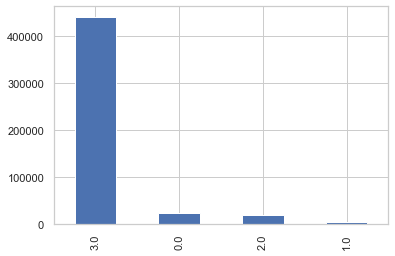

In [315]:
viz_data['is_computer'].value_counts().plot.bar()

# Exploring Telephone

In [316]:
viz_data['is_telephone'].nunique()

4

In [317]:
viz_data['is_telephone'].unique()

array([nan,  2.,  4.,  3.,  1.])

In [318]:
viz_data['is_telephone'].isnull().sum()

22498

In [319]:
#Filling in null values with 0 for not applicable
viz_data['is_telephone'].fillna(0, inplace = True)

In [320]:
viz_data['is_telephone'].value_counts()

2.0    226868
4.0    220446
0.0     22498
3.0     11283
1.0      6154
Name: is_telephone, dtype: int64

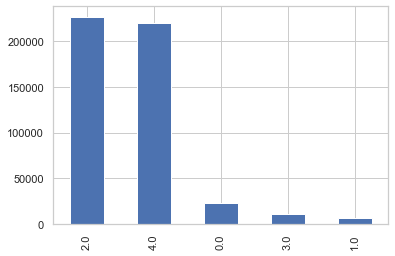

In [321]:
viz_data['is_telephone'].value_counts().plot.bar()

# Exploring Washing Machine

In [322]:
viz_data['is_washing_machine'].nunique()

2

In [323]:
viz_data['is_washing_machine'].unique()

array([nan,  2.,  1.])

In [324]:
viz_data['is_washing_machine'].isnull().sum()

22498

In [325]:
#Filling in null values with 0 for not applicable
viz_data['is_washing_machine'].fillna(0, inplace = True)

In [326]:
viz_data['is_washing_machine'].value_counts()

2.0    451085
0.0     22498
1.0     13666
Name: is_washing_machine, dtype: int64

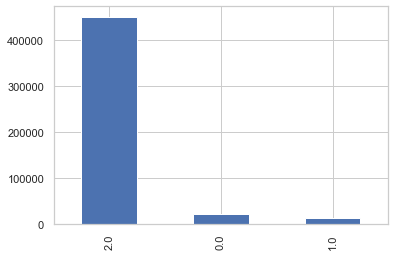

In [327]:
viz_data['is_washing_machine'].value_counts().plot.bar()

# Exploring Car

In [328]:
viz_data['is_car'].nunique()

2

In [329]:
viz_data['is_car'].unique()

array([nan,  2.,  1.])

In [330]:
viz_data['is_car'].isnull().sum()

22498

In [331]:
#Filling in null values with 0 for not applicable
viz_data['is_car'].fillna(0, inplace = True)

In [332]:
viz_data['is_car'].value_counts()

2.0    453684
0.0     22498
1.0     11067
Name: is_car, dtype: int64

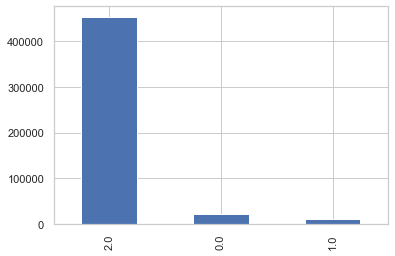

In [333]:
viz_data['is_car'].value_counts().plot.bar()

# Exploring Land Possessed  

In [334]:
viz_data['land_possessed'].nunique()

6

In [335]:
viz_data['land_possessed'].unique()

array([nan,  2.,  6.,  3.,  1.,  4.,  5.])

In [336]:
viz_data['land_possessed'].isnull().sum()

22498

In [337]:
#Filling in null values with 0 for not applicable
viz_data['land_possessed'].fillna(0, inplace = True)

In [338]:
viz_data['land_possessed'].value_counts()

6.0    205871
2.0    133003
1.0     70356
3.0     39865
0.0     22498
4.0     10204
5.0      5452
Name: land_possessed, dtype: int64

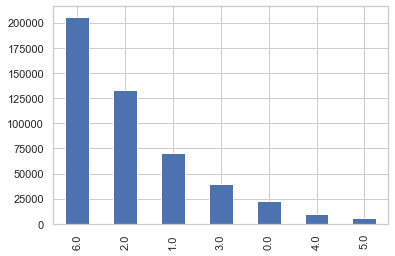

In [339]:
viz_data['land_possessed'].value_counts().plot.bar()

# Exploring is Water Pumped

In [340]:
viz_data['is_water_pump'].nunique()

2

In [341]:
viz_data['is_water_pump'].unique()

array([nan,  2.,  1.])

In [342]:
viz_data['is_water_pump'].isnull().sum()

22498

In [343]:
viz_data['is_water_pump'].fillna(0, inplace = True)

In [344]:
viz_data['is_water_pump'].value_counts()

2.0    436667
1.0     28084
0.0     22498
Name: is_water_pump, dtype: int64

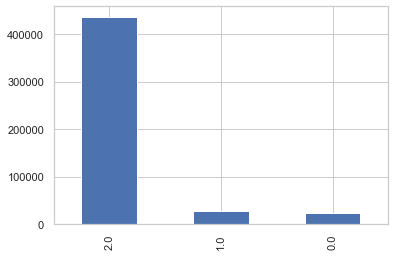

In [345]:
viz_data['is_water_pump'].value_counts().plot.bar()

In [346]:
viz_data['y'] = y

/Users/eddiecpognon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [347]:
viz_data.to_csv('viz_dataset.csv')